<a href="https://colab.research.google.com/github/AlejandraConB/Transcripciones_de_voz/blob/main/Transcripciones_de_voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carlfm01/120h-spanish-speech")

print("Path to dataset files:", path)

  5%|▌         | 1.18G/21.8G [00:30<08:40, 42.4MB/s]

In [ ]:
import os

# Assuming 'path' variable holds the dataset path from the previous cell
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(path):
    print(f"Directory: {root}")
    print(f"  Subdirectories: {dirs}")
    print(f"  Files: {files}")

In [ ]:
import os
import pandas as pd

data_path = "/root/.cache/kagglehub/datasets/carlfm01/120h-spanish-speech/versions/1/asr-spanish-v1-carlfm01/asr-spanish-v1-carlfm01"

# Read files.csv into a pandas DataFrame
csv_file_path = os.path.join(data_path, 'files.csv')
try:
    files_df = pd.read_csv(csv_file_path)
    print("Files.csv loaded successfully:")
    display(files_df.head())
except FileNotFoundError:
    print(f"Error: {csv_file_path} not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while reading files.csv: {e}")


# List audio files (assuming they are in a subdirectory named 'audios')
audio_dir_path = os.path.join(data_path, 'audios')
try:
    audio_files = [f for f in os.listdir(audio_dir_path) if f.endswith('.wav')]
    print("\nAudio files found successfully:")
    print("Number of audio files found:", len(audio_files))
    print("First 10 audio files:", audio_files[:10])
except FileNotFoundError:
    print(f"Error: Audio directory {audio_dir_path} not found. Please check the directory path.")
except Exception as e:
    print(f"An error occurred while listing audio files: {e}")

Files.csv loaded successfully:


,wav_filename,wav_filesize,transcript
0,audios/4da6b70e-0108-4f75-80ae-3d71f1dd2c2b.wav,219064,y aquí en dos palotadas hemos encontrado robus...
1,audios/8c2ab30b-0fd4-41c3-9724-3b15f2ee2c27.wav,271910,cuando los consejeros escucharon aquello queda...
2,audios/ca73c951-c62a-41fe-a953-9871514151f2.wav,64520,su mujer con la cara entre las manos
3,audios/067c4606-777b-4fb2-bc6f-8185fbec9016.wav,84222,y otros que se podían echar a la oreja de un toro
4,audios/49a08f90-3fc0-43ad-bd5e-a6b671cafdd4.wav,77316,al oír mis pasos alzó la cabeza



Audio files found successfully:
Number of audio files found: 112845
First 10 audio files: ['81300e5f-402e-4fbd-b479-f8636bab7730.wav', '22fb7b81-a9c6-4c72-a9cc-a6fddb944e37.wav', 'f22b8f6d-b658-47c4-b77a-5b218000c287.wav', '1bb64e33-4fcf-4701-b58a-49e1f7ad6dd5.wav', '0cea4738-6307-4862-9ada-3afd61e7648a.wav', 'c8746628-16c4-4cf5-808b-9cee93cf969a.wav', 'a6a4181b-96f3-4cac-904b-242fc7f161c4.wav', '0db5ddee-05db-4bb0-ad9b-eff98bf6b12f.wav', '3f80d4af-1bdd-48dd-9a6a-dfbd87a644ef.wav', 'b2960a31-2c0f-4c94-8414-30570a521048.wav']


Successfully loaded audio file: 81300e5f-402e-4fbd-b479-f8636bab7730.wav
Raw signal shape: (120173,)
Sampling rate: 22050
Spectrogram shape: (128, 235)


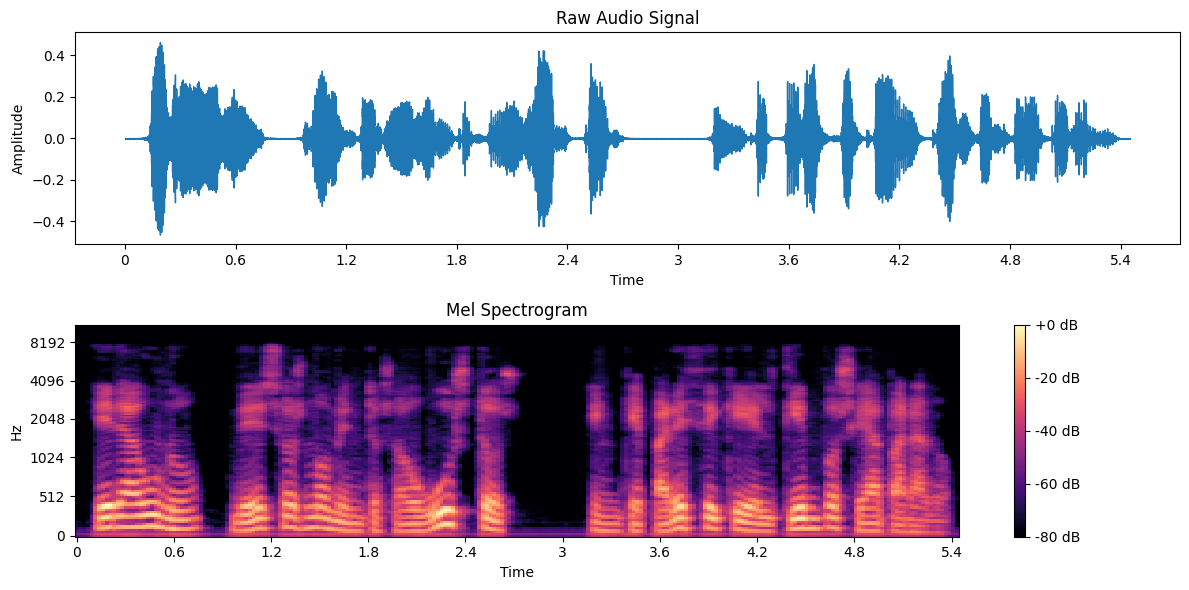

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Select the first audio file from the list (you can change the index to select a different file)
if audio_files:
    selected_audio_file = audio_files[0]
    audio_file_path = os.path.join(audio_dir_path, selected_audio_file)

    # Load the audio file to get the raw signal and sampling rate
    try:
        raw_signal, sr = librosa.load(audio_file_path)

        # Generate the spectrogram
        spectrogram = librosa.feature.melspectrogram(y=raw_signal, sr=sr)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)


        print(f"Successfully loaded audio file: {selected_audio_file}")
        print("Raw signal shape:", raw_signal.shape)
        print("Sampling rate:", sr)
        print("Spectrogram shape:", spectrogram_db.shape)

        # Visualize the raw signal and spectrogram
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        librosa.display.waveshow(raw_signal, sr=sr)
        plt.title('Raw Audio Signal')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        plt.subplot(2, 1, 2)
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: Audio file not found at {audio_file_path}")
    except Exception as e:
        print(f"An error occurred while processing the audio file: {e}")
else:
    print("No audio files found in the specified directory.")

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming audio_files is already loaded from a previous step
if 'audio_files' in locals() and audio_files:
    # Split the audio files into training and testing sets (e.g., 80% train, 20% test)
    train_files, test_files = train_test_split(audio_files, test_size=0.2, random_state=42)

    print("Number of training audio files:", len(train_files))
    print("Number of testing audio files:", len(test_files))

    print("\nFirst 10 training files:", train_files[:10])
    print("First 10 testing files:", test_files[:10])
else:
    print("Audio files list is not available. Please make sure the previous cell to load audio files was executed.")

Number of training audio files: 90276
Number of testing audio files: 22569

First 10 training files: ['d7fded27-8df4-42e4-8eda-a88a38490359.wav', 'aa431247-5e86-4abc-98e0-320acf51e813.wav', 'e233517b-deb4-4753-a521-00b35be52eb1.wav', 'ea81abec-5545-43b0-a830-16a57fd296eb.wav', '427dce41-db1b-470b-b9b7-402168c40c62.wav', '06f4ffd3-39a5-4d33-b2c1-8a4856ccf4f1.wav', '580485d4-2e80-46ab-b1e4-8457a6e3a634.wav', 'e107143c-3964-466b-a4ad-735bd668a0fd.wav', 'c66a458a-9c54-40c1-a405-8a8780510e29.wav', '14692cde-5d57-4e0f-a436-49e1cc5d60df.wav']
First 10 testing files: ['05dc3e6d-0d28-4652-8824-4448c0716f73.wav', 'a291d8c5-9d4e-41fe-ab05-2968beb7f3c9.wav', '8d80816e-2f9d-4788-998e-d9a3e191aaf6.wav', 'ef64de86-28af-49cc-aca3-1cf8d06153ec.wav', 'c286b80c-7c0d-4413-a69e-cdcb9a0631af.wav', 'c0d22dbf-52e8-43a9-811f-074d617a77ec.wav', '5daff416-c85e-4e13-bffe-9f104dde5578.wav', '3fce0426-a137-464e-a174-37cd737141b1.wav', '2897a3bf-0358-43c5-ab73-a9bde2f481c0.wav', 'e0889323-62f6-4b5e-a7ef-ba9f9a8a77e5